In [1]:
# IMPORTING NECESSARY LIBRARIES & TOOLS FOR USE
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import copy


## Loading the Dataset


In [4]:
# Loading a particular dataset

# print(os.getcwd())
# os.chdir(f'{os.getcwd()}/Downloads')
print(os.getcwd())

# Display the first 10 rows of the dataset

df = pd.read_csv(r'datafile.csv')
df.head(10)

/Users/jaharpaul/Downloads


,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
5,Rural+Urban,2013,February,110.4,110.2,112.8,104.9,105.5,103.6,103.2,...,100.4,106.0,105.2,104.5,104.2,103.6,103.9,104.5,104.4,105.3
6,Rural,2013,March,110.2,108.8,109.9,105.6,106.2,105.7,101.4,...,NaN,106.1,105.6,104.7,104.6,104.0,104.3,104.3,104.6,106.0
7,Urban,2013,March,113.9,111.4,113.2,104.3,102.7,104.9,103.8,...,100.4,106.0,105.7,105.2,105.5,103.5,103.8,104.2,104.9,105.0
8,Rural+Urban,2013,March,111.4,109.7,111.2,105.1,104.9,105.3,102.2,...,100.4,106.1,105.6,104.9,105.1,103.7,104.0,104.3,104.7,105.5
9,Rural,2013,April,110.2,109.5,106.9,106.3,105.7,108.3,103.4,...,NaN,106.5,106.1,105.1,104.4,104.5,104.8,102.7,104.6,106.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               398 non-null    object 
 1   Year                                 398 non-null    int64  
 2   Month                                398 non-null    object 
 3   Cereals and products                 395 non-null    float64
 4   Meat and fish                        392 non-null    float64
 5   Egg                                  395 non-null    float64
 6   Milk and products                    395 non-null    float64
 7   Oils and fats                        395 non-null    float64
 8   Fruits                               395 non-null    float64
 9   Vegetables                           395 non-null    float64
 10  Pulses and products                  395 non-null    float64
 11  Sugar and Confectionery         

# BASIC STATISTICS & PLOTS

In [6]:
df.iloc[:,3:-1].describe()

,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,Sugar and Confectionery,Spices,...,Footwear,Clothing and footwear,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous
count,395.000000,392.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,392.000000,392.000000,395.000000,392.000000,395.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,139.681772,160.298214,144.005316,143.046835,134.016456,143.192152,159.648861,145.113165,112.039494,150.685570,...,138.930102,144.731633,139.472658,139.354337,141.805316,129.767092,136.526786,143.850000,136.884184,137.137500
std,18.412738,35.632654,25.030982,20.496547,29.827295,19.030258,31.650929,27.087868,9.699548,34.951368,...,22.162722,23.346580,24.257135,21.217708,26.060296,20.956529,21.830434,22.901783,26.012078,22.887426
min,107.500000,106.300000,102.700000,103.600000,101.100000,102.300000,101.400000,103.500000,85.300000,101.800000,...,105.000000,105.800000,105.400000,104.800000,104.000000,103.200000,102.900000,103.500000,102.100000,103.700000
25%,124.650000,131.300000,123.350000,128.750000,111.250000,131.100000,136.700000,121.000000,103.950000,129.650000,...,121.600000,126.075000,118.150000,121.950000,119.600000,112.000000,118.075000,125.675000,113.275000,117.200000
50%,136.800000,146.500000,137.400000,141.700000,121.100000,142.800000,155.400000,142.600000,113.800000,140.200000,...,135.550000,143.200000,136.400000,137.350000,136.200000,121.100000,132.450000,143.850000,129.600000,132.150000
75%,148.250000,198.550000,168.850000,156.100000,159.100000,155.550000,177.550000,165.350000,119.850000,165.500000,...,150.450000,158.325000,156.900000,154.400000,163.150000,150.425000,155.100000,161.825000,158.925000,156.850000
max,188.600000,226.600000,206.100000,183.200000,209.900000,186.700000,295.300000,210.100000,131.400000,249.800000,...,190.900000,194.800000,187.400000,183.300000,193.800000,172.200000,177.400000,186.000000,190.100000,183.800000


CHECKING LINEARITY OF DATA USING PAIRPLOTS

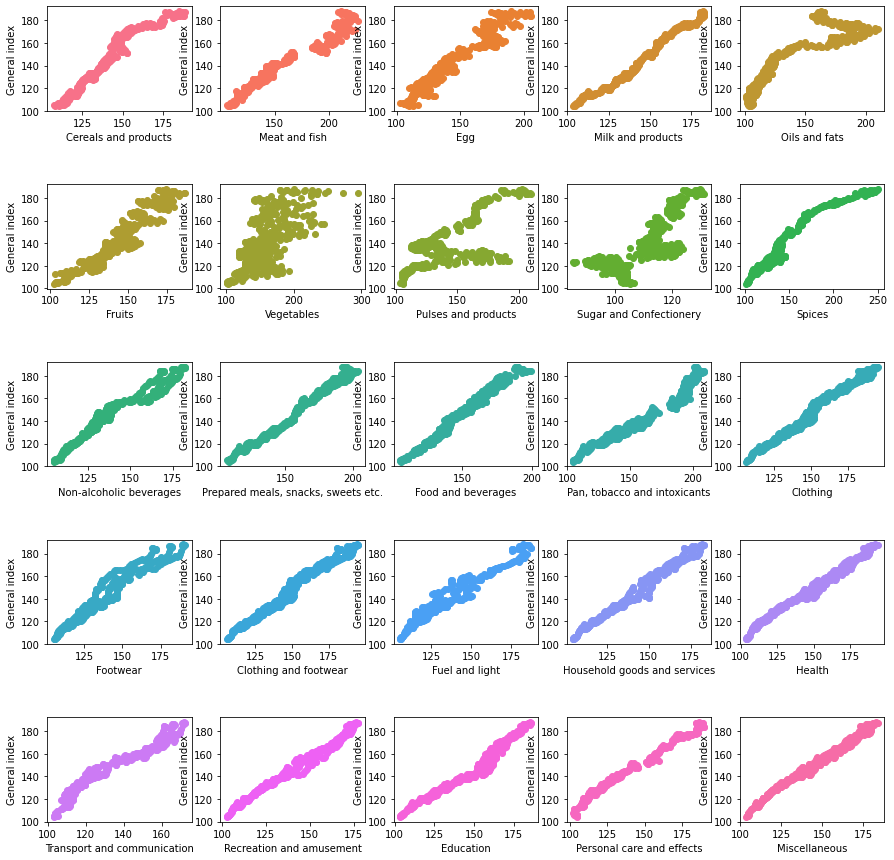

In [7]:
# We are checking if each independent variable is linear with respect to dependent variable GENERAL INDEX

independent_vars = [_ for _ in df.columns[3:-1] if _ != "Housing"]
dependent_var = "General index"
fig, axes = plt.subplots(5, 5, figsize=(15, 15))  # 5x5 grid

# Flatten the 2D array of axes to iterate over them
axes = axes.flatten()
colors = sns.color_palette("husl", 25)  # 25 distinct colors
# Plot each independent variable against the dependent variable
for i, col in enumerate(independent_vars):
    axes[i].scatter(df[col], df[dependent_var], label=f'{col} vs {dependent_var}', color=colors[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(dependent_var)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

MULTICOLLINEARITY CHECKING

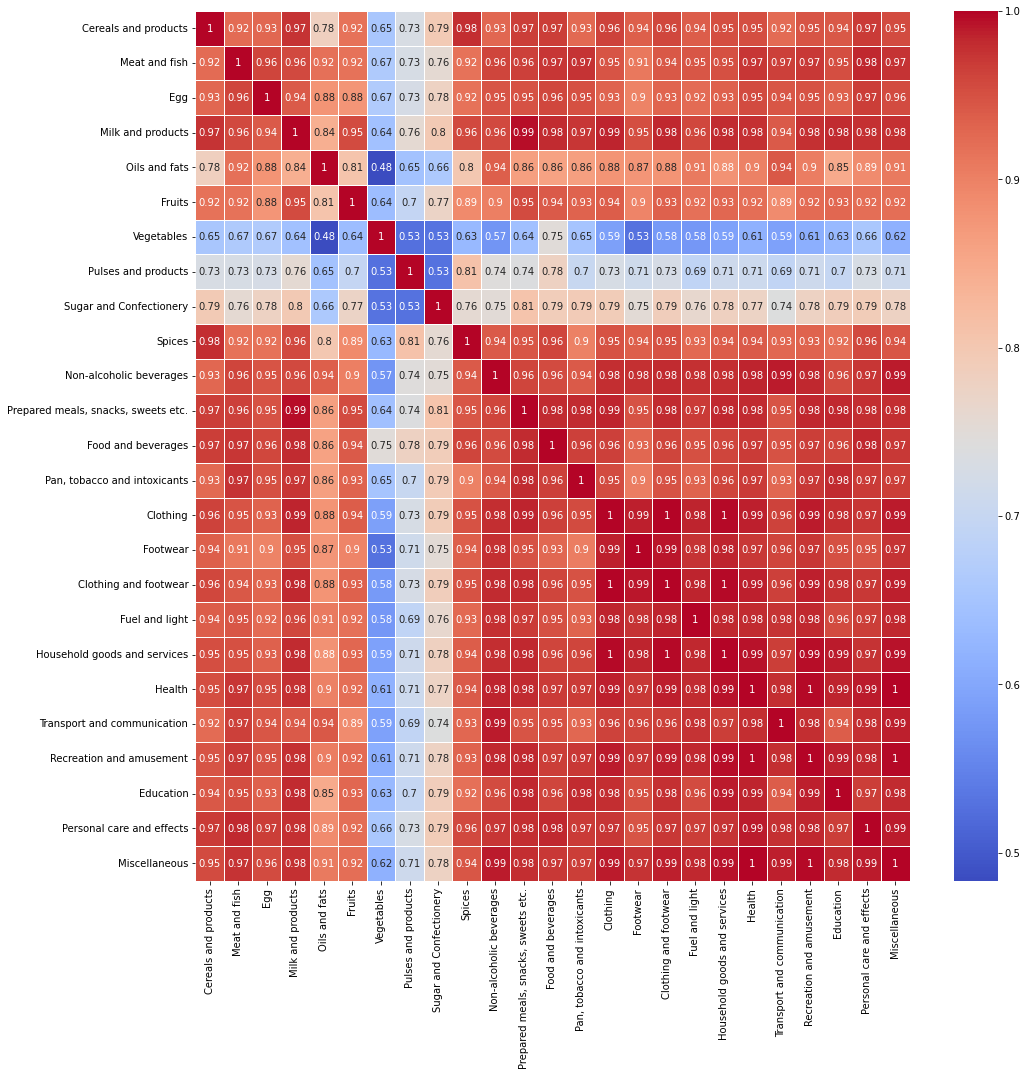

In [8]:
corr_matrix = df.iloc[:,list(range(3,20))+list(range(21,29))].corr()

# Create a heatmap
plt.figure(figsize=(16, 16))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# The below diagram depicts that there is a high Multicollinearity

# DATA CLEANING & OUTLIER IMPUTATION

In [9]:
df['Housing'] = pd.to_numeric(df['Housing'] , errors = 'coerce')

In [10]:
def outlier_cleanser(dataframe,leave_columns) :
    if not isinstance(dataframe,pd.DataFrame) :
        return 'The given input type is not a Pandas DataFrame'
    columns = tuple(dataframe.columns)
    allowed_dtypes = ('int64','float64')
    dataframe_dict = {col : [] for col in columns}
    for col in columns :
        if col not in leave_columns :
            if (dataframe[col].dtype == 'int64' or dataframe[col].dtype == 'float64') :
                array = dataframe[col].values
                q1 , q3 =np.nanquantile(array,0.25) , np.nanquantile(array,0.75)
                iqr = q3 - q1
                output = []
                for i in array:
                    if np.isnan(i) :
                        output.append(np.NAN)
                    elif (q1-1.5*iqr)<= i <=(q3+1.5*iqr):
                        output.append(i)
                    else:
                        output.append(np.NAN)
                dataframe_dict[col] = output
            else :
                dataframe_dict[col] = dataframe[col].to_list()
        else :
            dataframe_dict[col] = dataframe[col].to_list()

    return pd.DataFrame(dataframe_dict)

data=outlier_cleanser(df,leave_columns=['General index' , 'Year'])
data

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,Rural,2024,January,NaN,209.9,204.8,182.6,161.2,169.7,179.9,...,NaN,184.1,182.9,193.2,172.0,177.2,185.8,188.6,183.4,187.3
394,Urban,2024,January,NaN,219.4,206.1,182.8,155.8,174.5,226.2,...,177.6,175.7,173.0,187.8,162.1,172.2,180.8,189.9,175.2,183.5
395,Rural+Urban,2024,January,NaN,213.2,205.3,182.7,159.2,171.9,195.6,...,177.6,180.9,178.2,191.2,166.8,174.4,182.9,189.1,179.4,185.5
396,Rural,2024,February,NaN,214.8,201.7,182.9,160.2,169.2,179.8,...,NaN,183.8,183.3,193.8,172.2,177.4,186.0,188.8,183.8,187.4


In [11]:
# We check for percentage of Nan Values in each column 

for col in data.columns[3:] :
    print(f'Percentage of Null values in {col} : {(len(data[data[col].isnull()])/len(data))*100} % ')

Percentage of Null values in Cereals and products : 3.5175879396984926 % 
Percentage of Null values in Meat and fish : 1.507537688442211 % 
Percentage of Null values in Egg : 0.7537688442211055 % 
Percentage of Null values in Milk and products : 0.7537688442211055 % 
Percentage of Null values in Oils and fats : 0.7537688442211055 % 
Percentage of Null values in Fruits : 0.7537688442211055 % 
Percentage of Null values in Vegetables : 2.261306532663317 % 
Percentage of Null values in Pulses and products : 0.7537688442211055 % 
Percentage of Null values in Sugar and Confectionery : 0.7537688442211055 % 
Percentage of Null values in Spices : 7.2864321608040195 % 
Percentage of Null values in Non-alcoholic beverages : 0.7537688442211055 % 
Percentage of Null values in Prepared meals, snacks, sweets etc. : 1.507537688442211 % 
Percentage of Null values in Food and beverages : 0.7537688442211055 % 
Percentage of Null values in Pan, tobacco and intoxicants : 1.507537688442211 % 
Percentage of 

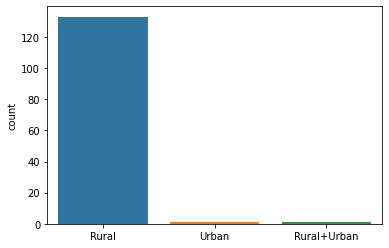

In [12]:
# We note that the Housing column have more that 33 % of the missing values
# NOTE That there are 3 types of Missing Data 
# It is easy to note from Given Barchart below that NULL VALUES in Housing Index column is of MAR type

sns.countplot(x = data[data['Housing'].isnull()]['Sector'].values)
plt.show()

In [13]:
# Though the data is of MAR type but , due to large volume of missing values we decide not to take into account the 
# Column . The alternative could be imputation from other values within the Rural type .
# If time permits we will also look into the alternative part .

data = data.drop(['Housing'],axis=1)
data

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Clothing and footwear,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,106.4,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,105.8,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,106.2,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,107.0,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,106.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,Rural,2024,January,NaN,209.9,204.8,182.6,161.2,169.7,179.9,...,194.6,184.1,182.9,193.2,172.0,177.2,185.8,188.6,183.4,187.3
394,Urban,2024,January,NaN,219.4,206.1,182.8,155.8,174.5,226.2,...,183.1,175.7,173.0,187.8,162.1,172.2,180.8,189.9,175.2,183.5
395,Rural+Urban,2024,January,NaN,213.2,205.3,182.7,159.2,171.9,195.6,...,190.0,180.9,178.2,191.2,166.8,174.4,182.9,189.1,179.4,185.5
396,Rural,2024,February,NaN,214.8,201.7,182.9,160.2,169.2,179.8,...,194.8,183.8,183.3,193.8,172.2,177.4,186.0,188.8,183.8,187.4


In [14]:
# Define the RandomForestRegressor as the estimator
estimator = RandomForestRegressor(n_estimators=10, random_state=42)

# Create an IterativeImputer with the RandomForestRegressor
imputer = IterativeImputer(estimator=estimator, max_iter=10,random_state=42)

# Perform imputation
df_imputed = imputer.fit_transform(data.iloc[:,3:])

# Convert the imputed data back to a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=data.iloc[:,3:].columns)

df_imputed

,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,Sugar and Confectionery,Spices,...,Clothing and footwear,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,107.50,106.3,108.1,104.9,106.1,103.9,101.9,106.1,106.8,103.10,...,106.4,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,110.50,109.1,113.0,103.6,103.4,102.3,102.9,105.8,105.1,101.80,...,105.8,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,108.40,107.3,110.0,104.4,105.1,103.2,102.2,106.0,106.2,102.70,...,106.2,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,109.20,108.7,110.2,105.4,106.7,104.0,102.4,105.9,105.7,103.10,...,107.0,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,112.90,112.9,116.9,104.0,103.5,103.1,104.9,104.1,103.8,102.30,...,106.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,180.59,209.9,204.8,182.6,161.2,169.7,179.9,202.5,129.7,215.45,...,194.6,184.1,182.9,193.2,172.0,177.2,185.8,188.6,183.4,187.3
394,182.29,219.4,206.1,182.8,155.8,174.5,226.2,207.7,131.0,200.25,...,183.1,175.7,173.0,187.8,162.1,172.2,180.8,189.9,175.2,183.5
395,182.75,213.2,205.3,182.7,159.2,171.9,195.6,204.3,130.1,211.39,...,190.0,180.9,178.2,191.2,166.8,174.4,182.9,189.1,179.4,185.5
396,182.06,214.8,201.7,182.9,160.2,169.2,179.8,200.8,128.7,214.96,...,194.8,183.8,183.3,193.8,172.2,177.4,186.0,188.8,183.8,187.4


# Train - Test Split

In [15]:
# We perform the train-test splitting

X = df_imputed.iloc[:,:-1]
y = df_imputed.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Multiple Linear Regression

In [29]:
Time_Dictionary = dict()
MSE_Dictionary , R2_Dictionary = dict() , dict()
MAE_Dictionary = dict()

In [30]:
from sklearn.linear_model import LinearRegression

start_time=time.time()
lr=LinearRegression()
lr.fit(X_train,y_train)
end_time=time.time()
Time_Dictionary['Linear Regression'] = end_time-start_time

In [32]:
print("********   METRICS FOR TRAINING DATA   ********")
print()
y_pred=lr.predict(X_train)

print(f'R2 Value  : {r2_score(y_pred,y_train)}')
print(f'MSE       : {mean_squared_error(y_pred,y_train)}')
print(f'MAE       : {mean_absolute_error(y_pred,y_train)}')
print()
print("********   METRICS FOR TEST DATA   ********")
print()
y_pred_test = lr.predict(X_test)
print(f'R2 Value  : {r2_score(y_pred_test,y_test)}')
print(f'MSE       : {mean_squared_error(y_pred_test,y_test)}')
print(f'MAE       : {mean_absolute_error(y_pred_test,y_test)}')

MSE_Dictionary['Multiple Linear Regression'] = mean_squared_error(y_pred_test,y_test)
MAE_Dictionary['Multiple Linear Regression'] = mean_absolute_error(y_pred_test,y_test)
R2_Dictionary['Multiple Linear Regression'] = r2_score(y_pred_test,y_test)

********   METRICS FOR TRAINING DATA   ********

R2 Value  : 0.9997166998181445
MSE       : 0.13605315173513918
MAE       : 0.29185264534014227

********   METRICS FOR TEST DATA   ********

R2 Value  : 0.9997617748092326
MSE       : 0.14541801490259543
MAE       : 0.2872970926984683



# Polynomial Regression
Implementing polynomial regression for degrees 2, 3, and 4.


In [33]:
start = time.time()
# We want to generate a polynomial eqn of degree 2 
polynomial_features = PolynomialFeatures(degree=2)

# Now we have to transform out Training dataset into suitable format for doing linear regression
# NOTE that we are just transforming the X_train matrix but our original task is linear regression if we think
# from the angle of features . 
X_Poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(X_Poly, y_train)
end = time.time()
Time_Dictionary['Polynomial_Degree 2'] = end-start

y_poly_pred = model.predict(X_Poly)


In [34]:
# LET US Calculate the metrics for training data
print("********   METRICS FOR TRAINING DATA   ********")
print()
print(f'R2 Value  : {r2_score(y_poly_pred,y_train)}')
print(f'MSE       : {mean_squared_error(y_poly_pred,y_train)}')
print(f'MAE       : {mean_absolute_error(y_pred,y_train)}')
print()

# Now we use the weights learned from Training data and note the Generalization error

print("********   METRICS FOR TEST DATA   ********")
print()
X_test_poly = polynomial_features.fit_transform(X_test)
y_pred_test = model.predict(X_test_poly)
print(f'R2 Value  :  {r2_score(y_pred_test,y_test)}')
print(f'MSE       :  {mean_squared_error(y_pred_test,y_test)}')
print(f'MAE       : {mean_absolute_error(y_pred_test,y_test)}')

MSE_Dictionary['Polynomial Degree 2'] = mean_squared_error(y_pred_test,y_test)
MAE_Dictionary['Polynomial Degree 2'] = mean_absolute_error(y_pred_test,y_test)
R2_Dictionary['Polynomial Degree 2'] = r2_score(y_pred_test,y_test)

********   METRICS FOR TRAINING DATA   ********

R2 Value  : 1.0
MSE       : 3.7176046599653606e-22
MAE       : 0.29185264534014227

********   METRICS FOR TEST DATA   ********

R2 Value  :  0.9958400284829415
MSE       :  2.6635922459553947
MAE       : 0.5676889203876593


In [35]:
# Now let us analyse with polynomial eqn of degree 3
start = time.time()
polynomial_features = PolynomialFeatures(degree=3)
 
X_Poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(X_Poly, y_train)
end = time.time()
Time_Dictionary['Polynomial_Degree 3'] = end-start
y_poly_pred = model.predict(X_Poly)

In [36]:
print("********   METRICS FOR TRAINING DATA   ********")
print()
print(f'R2 Value  : {r2_score(y_poly_pred,y_train)}')
print(f'MSE       : {mean_squared_error(y_poly_pred,y_train)}')
print(f'MAE       : {mean_absolute_error(y_pred,y_train)}')
print()
print("********   METRICS FOR TEST DATA   ********")
print()
X_test_poly = polynomial_features.fit_transform(X_test)
y_pred_test = model.predict(X_test_poly)
print(f'R2 Value  :  {r2_score(y_pred_test,y_test)}')
print(f'MSE       :  {mean_squared_error(y_pred_test,y_test)}')
print(f'MAE       : {mean_absolute_error(y_pred,y_train)}')

MSE_Dictionary['Polynomial Degree 3'] = r2_score(y_pred_test,y_test)
MAE_Dictionary['Polynomial Degree 3'] = mean_absolute_error(y_pred_test,y_test)
R2_Dictionary['Polynomial Degree 3'] = r2_score(y_pred_test,y_test)

********   METRICS FOR TRAINING DATA   ********

R2 Value  : 1.0
MSE       : 5.638294312742404e-24
MAE       : 0.29185264534014227

********   METRICS FOR TEST DATA   ********

R2 Value  :  0.9998663512815478
MSE       :  0.08187625612424618
MAE       : 0.29185264534014227


In [37]:
# As a Final step we complete with polynomial eqn of degree 4
start = time.time()
polynomial_features = PolynomialFeatures(degree=4)
 
X_Poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(X_Poly, y_train)
end = time.time()
Time_Dictionary['Polynomial_Degree 4'] = end-start
y_poly_pred = model.predict(X_Poly)

In [38]:
print("********   METRICS FOR TRAINING DATA   ********")
print()
print(f'R2 Value  : {r2_score(y_poly_pred,y_train)}')
print(f'MSE       : {mean_squared_error(y_poly_pred,y_train)}')
print(f'MAE       : {mean_absolute_error(y_pred,y_train)}')

print()
print("********   METRICS FOR TEST DATA   ********")
print()
X_test_poly = polynomial_features.fit_transform(X_test)
y_pred_test = model.predict(X_test_poly)
print(f'R2 Value  :  {r2_score(y_pred_test,y_test)}')
print(f'MSE       :  {mean_squared_error(y_pred_test,y_test)}')
print(f'MAE       : {mean_absolute_error(y_pred_test,y_test)}')

MSE_Dictionary['Polynomial Degree 4'] = mean_squared_error(y_pred_test,y_test)
MAE_Dictionary['Polynomial Degree 4'] = mean_absolute_error(y_pred_test,y_test)
R2_Dictionary['Polynomial Degree 4'] = r2_score(y_pred_test,y_test)

********   METRICS FOR TRAINING DATA   ********

R2 Value  : 1.0
MSE       : 1.6324021952649628e-24
MAE       : 0.29185264534014227

********   METRICS FOR TEST DATA   ********

R2 Value  :  0.999737240950363
MSE       :  0.16294132854482973
MAE       : 0.2453024374553346


# Gradient Descent Methods
Implementing batch, stochastic, and mini-batch gradient descent for linear regression.

# A ) Batch Gradient Descent

In [40]:
def Batch_Gradient_Descent(X , Y , learning_rate , iterations_count) :
    
    if learning_rate < 0 :
        raise ValueError('Learning Rate must be positive')
        
    if len(X) != len(Y) :
        raise ValueError(f'Length of X : {len(X)} and Y : {len(Y)} is not Matching')
         
    if iterations_count >= 1 :
        mse_dict = dict()
        theta = np.zeros((len(X_train.values[0]), 1))   #Initialization with theta values = (0,0,0....,0)
        num_rows = len(X.values)
        X , Y = X.values , Y.values.reshape(-1,1)
        cache_matrix1 , cache_matrix2 = np.dot(X.T,X) , np.dot(X.T , Y)
        for _ in range(iterations_count) :
            gradient = np.dot(cache_matrix1,theta)-cache_matrix2
            theta = theta - ((2*(learning_rate*gradient))/num_rows)
            
            if _% 10 == 0 :
                mse_dict[_] = mean_squared_error(np.dot(X,theta),Y)
                 
        return theta,mse_dict

In [41]:
# We are doing 84 Lakhs of Iterations (approximately) to get a descent value of theta

start = time.time()
weights , error_dict = Batch_Gradient_Descent(X = X_train , Y = y_train , learning_rate = 1e-8 , iterations_count = 2**23)
end = time.time()
Time_Dictionary['Batch Gradient Descent'] = end-start

Cost History Plotting for Batch Gradient Descent

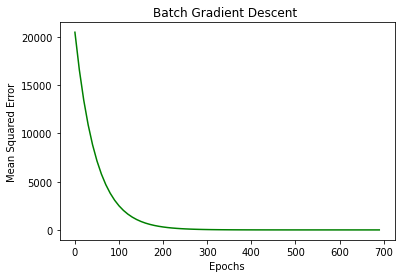

In [42]:
x = list(error_dict.keys())
y = list(error_dict.values())
plt.plot(x[:70] , y[:70] , color = 'green')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Batch Gradient Descent ')
plt.show()

In [43]:
print("********   METRICS FOR TRAINING DATA   ********")
print()

y_pred = np.dot(X_train,weights)

print(f'R2 Value  : {r2_score(y_pred,y_train)}')
print(f'MSE       : {mean_squared_error(y_pred,y_train)}')
print(f'MAE       : {mean_absolute_error(y_pred,y_train)}')
print()

# Now we use the weights learned from Training data and note the Generalization error

print("********   METRICS FOR TEST DATA   ********")
print()
y_pred_test = np.dot(X_test,weights)
print(f'R2 Value  : {r2_score(y_pred_test,y_test)}')
print(f'MSE       : {mean_squared_error(y_pred_test,y_test)}')
print(f'MAE       : {mean_absolute_error(y_pred_test,y_test)}')

MSE_Dictionary['Batch Gradient Descent'] = mean_squared_error(y_pred_test,y_test)
MAE_Dictionary['Batch Gradient Descent'] = mean_absolute_error(y_pred_test,y_test)
R2_Dictionary['Batch Gradient Descent'] = r2_score(y_pred_test,y_test)

********   METRICS FOR TRAINING DATA   ********

R2 Value  : 0.9993649354939222
MSE       : 0.30487763667063883
MAE       : 0.4225326820791319

********   METRICS FOR TEST DATA   ********

R2 Value  : 0.9993396415187501
MSE       : 0.40247229999425616
MAE       : 0.5217929721657686


# B ) STOCHASTIC GRADIENT DESCENT

In [44]:
def Stochastic_Gradient_Descent(X , Y , learning_rate , iterations_count , epochs_count=10) :
    if learning_rate < 0 :
        raise ValueError('Learning Rate must be positive')
        
    if len(X) != len(Y) :
        raise ValueError(f'Length of X : {len(X)} and Y : {len(Y)} is not Matching')
        
    if iterations_count >= 1 :
        theta = np.zeros((len(X_train.values[0]), 1))   #Initialization with theta values = (0,0,0....,0)
        num_rows = len(X.values)
        mse_dict = dict()
        for epoch in range(epochs_count) :
            for _ in range(iterations_count) :
                m = random.randint(0,num_rows)
                datapoint_X = X.iloc[m:m+1,:].values
                datapoint_Y = Y.iloc[m:m+1,].values.reshape(-1,1)
                prediction_error = np.dot(datapoint_X, theta) - datapoint_Y  # Shape (1, 1)
                gradient = np.dot(datapoint_X.T, prediction_error)  # Shape (n_features, 1)
                theta = theta - ((2*(learning_rate*gradient))/num_rows)

            if epoch % 5 == 0 :
#                 print(mean_squared_error(np.dot(X,theta),Y))
                mse_dict[epoch] = mean_squared_error(np.dot(X,theta),Y)
#                 print(mse_dict)

        return theta , mse_dict

In [45]:
start = time.time()
weight_stochastic , error_dict = Stochastic_Gradient_Descent(X = X_train , Y = y_train , 
                                                learning_rate = 1e-8, 
                                                iterations_count = 4000,epochs_count = 500) 
end = time.time()
Time_Dictionary['Stochastic Gradient Descent'] = end-start

Cost History Plotting for Stochastic Gradient Descent

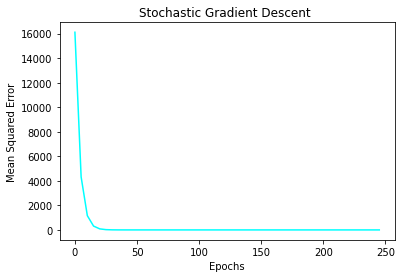

In [46]:
x = list(error_dict.keys())
y = list(error_dict.values())
plt.plot(x[:50] , y[:50] , color = 'cyan')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Stochastic Gradient Descent ')
plt.show()

In [47]:
print("********   METRICS FOR TRAINING DATA   ********")
print()

y_pred = np.dot(X_train,weights)

print(f'R2 Value  : {r2_score(y_pred,y_train)}')
print(f'MSE       : {mean_squared_error(y_pred,y_train)}')
print(f'MAE       : {mean_absolute_error(y_pred,y_train)}')
print()

# Now we use the weights learned from Training data and note the Generalization error

print("********   METRICS FOR TEST DATA   ********")
print()
y_pred_test = np.dot(X_test,weights)
print(f'R2 Value  : {r2_score(y_pred_test,y_test)}')
print(f'MSE       : {mean_squared_error(y_pred_test,y_test)}')
print(f'MAE       : {mean_absolute_error(y_pred_test,y_test)}')

MSE_Dictionary['Stochastic Gradient Descent'] = mean_squared_error(y_pred_test,y_test)
MAE_Dictionary['Stochastic Gradient Descent'] = mean_absolute_error(y_pred_test,y_test)
R2_Dictionary['Stochastic Gradient Descent'] = r2_score(y_pred_test,y_test)

********   METRICS FOR TRAINING DATA   ********

R2 Value  : 0.9993649354939222
MSE       : 0.30487763667063883
MAE       : 0.4225326820791319

********   METRICS FOR TEST DATA   ********

R2 Value  : 0.9993396415187501
MSE       : 0.40247229999425616
MAE       : 0.5217929721657686


# C ) MINI-BATCH GRADIENT DESCENT

In [48]:
def Mini_Batches(X,Y,size) :
    if size > len(X) :
        raise ValueError(f'Batch size {size} must be less than size of DataFrame size {len(X)}')
    row_indexed = [random.randint(0,len(X)-1) for _ in range(size)]
    X_mini = X.iloc[row_indexed]
    Y_mini = Y.iloc[row_indexed]
    return X_mini,Y_mini
    

def Mini_Batch_Gradient_Descent(X , Y , learning_rate , iterations_count , batch_size = 16 , epochs_count = 10) :
    if learning_rate < 0 :
        raise ValueError('Learning Rate must be positive')
        
    if len(X) != len(Y) :
        raise ValueError(f'Length of X : {len(X)} and Y : {len(Y)} is not Matching')
         
    if iterations_count >= 1 :
        theta = np.zeros((len(X_train.values[0]), 1))   #Initialization with theta values = (0,0,0....,0)
        num_rows = len(X.values)
        mse_dict = dict()
        for epoch in range(epochs_count) :        
            for _ in range(iterations_count) :
                X_ , Y_ = Mini_Batches(X,Y,size = batch_size)
                X_ , Y_ = X_.values , Y_.values.reshape(-1,1)
                cache_matrix1 , cache_matrix2 = np.dot(X_.T,X_) , np.dot(X_.T , Y_)
                gradient = np.dot(cache_matrix1,theta)-cache_matrix2
                theta = theta - ((2*(learning_rate*gradient))/num_rows)

            mse_dict[epoch] = mean_squared_error(np.dot(X,theta),Y)
        return theta , mse_dict

In [49]:
start = time.time()
mini_batch_weight , error_dict = Mini_Batch_Gradient_Descent(X = X_train , Y = y_train , 
                            learning_rate = 1e-8, batch_size=16,
                            iterations_count = 2000,epochs_count = 100)
mini_batch_weight
end = time.time()
Time_Dictionary['Mini Batch Gradient Descent'] = end-start

Cost History Plotting for Mini Batch Gradient Descent

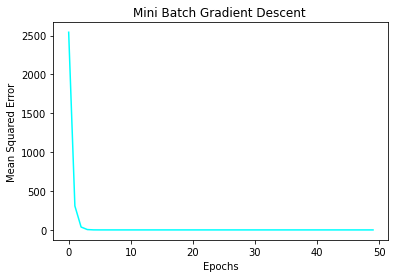

In [50]:
x = list(error_dict.keys())
y = list(error_dict.values())
plt.plot(x[:50] , y[:50] , color = 'cyan')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Mini Batch Gradient Descent ')
plt.show()

In [51]:
print("********   METRICS FOR TRAINING DATA   ********")
print()

y_pred = np.dot(X_train,weights)

print(f'R2 Value  : {r2_score(y_pred,y_train)}')
print(f'MSE       : {mean_squared_error(y_pred,y_train)}')
print(f'MAE       : {mean_absolute_error(y_pred,y_train)}')
print()

# Now we use the weights learned from Training data and note the Generalization error

print("********   METRICS FOR TEST DATA   ********")
print()
y_pred_test = np.dot(X_test,weights)
print(f'R2 Value  : {r2_score(y_pred_test,y_test)}')
print(f'MSE       : {mean_squared_error(y_pred_test,y_test)}')
print(f'MAE       : {mean_absolute_error(y_pred_test,y_test)}')

MSE_Dictionary['Mini Batch Gradient Descent'] = mean_squared_error(y_pred_test,y_test)
MAE_Dictionary['Mini Gradient Descent'] = mean_absolute_error(y_pred_test,y_test)
R2_Dictionary['Mini Batch Gradient Descent'] = r2_score(y_pred_test,y_test)

********   METRICS FOR TRAINING DATA   ********

R2 Value  : 0.9993649354939222
MSE       : 0.30487763667063883
MAE       : 0.4225326820791319

********   METRICS FOR TEST DATA   ********

R2 Value  : 0.9993396415187501
MSE       : 0.40247229999425616
MAE       : 0.5217929721657686



# Regularization Techniques (Ridge,  Lasso, Elastic Net Regression and Early Stopping)
Implementing Ridge, Lasso regression, Elastic Net Regression, and Early Stopping using scikit-learn and compare the results.


# Ridge Regression

In [53]:
start_time = time.time()
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_train, y_train)
end_time = time.time()
Time_Dictionary['Ridge Regression'] = end_time-start_time

In [57]:
print("********   METRICS FOR TRAINING DATA   ********")
y_predict=ridge_reg.predict(X_train)
print()
print(f'R2 Value  : {r2_score(y_predict,y_train)}')
print(f'MSE       : {mean_squared_error(y_predict,y_train)}')
print(f'MAE       : {mean_absolute_error(y_predict,y_train)}')
print()
print("********   METRICS FOR TEST DATA   ********")
print()
y_predict=ridge_reg.predict(X_test)
print(f'R2 Value  : {r2_score(y_predict,y_test)}')
print(f'MSE       : {mean_squared_error(y_predict,y_test)}')
print(f'MAE       : {mean_absolute_error(y_predict,y_test)}')

MSE_Dictionary['Ridge Regression'] = mean_squared_error(y_pred_test,y_test)
MAE_Dictionary['Ridge Regression'] = mean_absolute_error(y_pred_test,y_test)
R2_Dictionary['Ridge Regression'] = r2_score(y_pred_test,y_test)

********   METRICS FOR TRAINING DATA   ********

R2 Value  : 0.9997151678065673
MSE       : 0.13678699527012295
MAE       : 0.2920220362657291

********   METRICS FOR TEST DATA   ********

R2 Value  : 0.9997666470636043
MSE       : 0.1424295121817803
MAE       : 0.2860782976496008


# Lasso Regression

In [59]:
start_time = time.time()
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_train,y_train)
end_time = time.time()
Time_Dictionary['Lasso Regression'] = end_time-start_time

In [61]:
print("********   METRICS FOR TRAINING DATA   ********")
y_predict=lasso_reg.predict(X_train)
print()
print(f'R2 Value  : {r2_score(y_predict,y_train)}')
print(f'MSE       : {mean_squared_error(y_predict,y_train)}')
print(f'MAE       : {mean_absolute_error(y_predict,y_train)}')
print()
print("********   METRICS FOR TEST DATA   ********")
print()
y_predict=lasso_reg.predict(X_test)
print(f'R2 Value  : {r2_score(y_predict,y_test)}')
print(f'MSE       : {mean_squared_error(y_predict,y_test)}')
print(f'MAE       : {mean_absolute_error(y_predict,y_test)}')

MSE_Dictionary['Lasso Regression'] = mean_squared_error(y_pred_test,y_test)
MAE_Dictionary['Lasso Regression'] = mean_absolute_error(y_pred_test,y_test)
R2_Dictionary['Lasso Regression'] = r2_score(y_pred_test,y_test)

********   METRICS FOR TRAINING DATA   ********

R2 Value  : 0.9994356620967573
MSE       : 0.2698832444722777
MAE       : 0.3996656129414866

********   METRICS FOR TEST DATA   ********

R2 Value  : 0.9993915450195746
MSE       : 0.36924758200848906
MAE       : 0.4800087205384898


# Elastic Net Regression

In [70]:
start_time = time.time()
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=1,l1_ratio=0.5)
elastic_net.fit(X_train,y_train)
end_time = time.time()
Time_Dictionary["Elastic Net"] = end_time - start_time

In [71]:
print("********   METRICS FOR TRAINING DATA   ********")
print()
y_predict=elastic_net.predict(X_train)

print(f'R2 Value  : {r2_score(y_predict,y_train)}')
print(f'MSE       : {mean_squared_error(y_predict,y_train)}')
print(f'MAE       : {mean_absolute_error(y_predict,y_train)}')
print()
print("********   METRICS FOR TEST DATA   ********")
print()
y_predict=elastic_net.predict(X_test)
print(f'R2 Value  : {r2_score(y_predict,y_test)}')
print(f'MSE       : {mean_squared_error(y_predict,y_test)}')
print(f'MAE       : {mean_absolute_error(y_predict,y_test)}')

MSE_Dictionary['Elastic Net'] = mean_squared_error(y_pred_test,y_test)
MAE_Dictionary['Elastic Net'] = mean_absolute_error(y_pred_test,y_test)
R2_Dictionary['Elastic Net'] = r2_score(y_pred_test,y_test)

********   METRICS FOR TRAINING DATA   ********

R2 Value  : 0.9994659060916297
MSE       : 0.255863314727167
MAE       : 0.3898186987655739

********   METRICS FOR TEST DATA   ********

R2 Value  : 0.9994560478069031
MSE       : 0.3307664856884887
MAE       : 0.46340331305149823



# Normal Equation
 Implementing the normal equation method for linear regression.


In [75]:
from sklearn.preprocessing import add_dummy_feature
X1=add_dummy_feature(X_train)
X2=add_dummy_feature(X_test)
def normal_equation(X,Y):
    return np.linalg.pinv(X.T @ X) @ X.T @ Y

start_time=time.time()
theta_best=normal_equation(X1,y_train)
end_time=time.time()
Time_Dictionary['Normal Equation'] = end_time-start_time

In [76]:
print("********   METRICS FOR TRAINING DATA   ********")
y_predict = X1 @ theta_best
print()
print(f'R2 Value  : {r2_score(y_pred,y_train)}')
print(f'MSE       : {mean_squared_error(y_pred,y_train)}')
print(f'MAE       : {mean_absolute_error(y_pred,y_train)}')
print()
print("********   METRICS FOR TEST DATA   ********")
print()
y_predict = X2 @ theta_best
print(f'R2 Value  : {r2_score(y_predict,y_test)}')
print(f'MSE       : {mean_squared_error(y_predict,y_test)}')
print(f'MAE       : {mean_absolute_error(y_predict,y_test)}')

MSE_Dictionary['Normal Equation'] = mean_squared_error(y_pred_test,y_test)
MAE_Dictionary['Normal Equation'] = mean_absolute_error(y_pred_test,y_test)
R2_Dictionary['Normal Equation'] = r2_score(y_pred_test,y_test)

********   METRICS FOR TRAINING DATA   ********

R2 Value  : 0.9993649354939222
MSE       : 0.30487763667063883
MAE       : 0.4225326820791319

********   METRICS FOR TEST DATA   ********

R2 Value  : 0.9997617748334537
MSE       : 0.14541800027541563
MAE       : 0.28729708746084537


## 8. Implement linear Regression using SVD


In [87]:
import time
def svd_equation(X, Y):
    theta_best_svd = 0 
    theta_best_svd, residuals, rank, s = np.linalg.lstsq(X,Y, rcond=1e-6)
    return theta_best_svd

start_time = time.time()
theta  = svd_equation(X1,y_train)
end_time = time.time()
y_predict = X2 @ theta
Time_Dictionary['SVD Equation'] = end_time - start_time

In [90]:
print("********   METRICS FOR TRAINING DATA   ********")
print()
y_predict = X1 @ theta
print(f'R2 Value  : {r2_score(y_pred,y_train)}')
print(f'MSE       : {mean_squared_error(y_pred,y_train)}')
print(f'MAE       : {mean_absolute_error(y_pred,y_train)}')
print()
print("********   METRICS FOR TEST DATA   ********")
print()
y_predict = X2 @ theta
print(f'R2 Value  : {r2_score(y_predict,y_test)}')
print(f'MSE       : {mean_squared_error(y_predict,y_test)}')
print(f'MAE       : {mean_absolute_error(y_predict,y_test)}')

MSE_Dictionary['SVD'] = mean_squared_error(y_pred_test,y_test)
MAE_Dictionary['SVD'] = mean_absolute_error(y_pred_test,y_test)
R2_Dictionary['SVD'] = r2_score(y_pred_test,y_test)

********   METRICS FOR TRAINING DATA   ********

R2 Value  : 0.9993649354939222
MSE       : 0.30487763667063883
MAE       : 0.4225326820791319

********   METRICS FOR TEST DATA   ********

R2 Value  : 0.9997617748092325
MSE       : 0.14541801490261647
MAE       : 0.28729709269847187


# EARLY STOPPING

In [100]:
# We create train test validation split to facilitate Early Stopping
X = df_imputed.iloc[:,:-1]
y = df_imputed.iloc[:,-1]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size= 0.50, random_state=42)

In [101]:
def Early_Stopping(X_train,Y_train,X_Val,Y_Val,learning_rate = 1e-8,iterations_count = 2*20,method='Batch',patience=10,batch_size = 16,degree = 10) :
    # We Ensure that warnings are displayed
    warnings.simplefilter('always', UserWarning)
    
    if learning_rate < 0 :
        raise ValueError('Learning Rate must be positive')
        
    if len(X_train) != len(Y_train) :
        raise ValueError(f'Length of X : {len(X_train)} and Y : {len(Y_train)} is not Matching')
        
    if method == 'Batch' :
        warnings.warn('This will iterate for 1 Crore 68 Lakhs times . Dont use this without High Computation Powers')
        mse_dict = dict()
        best_loss = float('inf')
        for iter_ in range(2**19,iterations_count) :
            weights = Batch_Gradient_Descent(X_train,Y_train,learning_rate,iterations_count=iter_)
            prediction = np.dot(X_Val , np.array(weights).reshape(len(X_train.values[0]),1))
            curr_loss = mean_squared_error(prediction , Y_Val)
            mse_dict[iter_] = curr_loss
            if curr_loss < best_loss :
                best_loss = curr_loss
                best_weights = copy.deepcopy(weights)
                not_improving = 0
            else:
                not_improving += 1
                if not_improving > patience :
                    print(f'Stopping at Earlier epoch {iter_}')
                    break
        return best_weights,best_loss,mse_dict 

    
    elif method == 'Mini_Batch' :
        
        mse_dict = dict()
        if batch_size > 128 :
            warnings.warn(' High values of Batch size can overload the memory ')
        elif batch_size < 16 :
            warnings.warn(' Low values of Batch size can make the convergence slower ')
            
            
        not_improving = 0
        best_loss = float('inf')
        for iter_ in range(1,iterations_count) :
            weights ,error_dict = Mini_Batch_Gradient_Descent(X_train,Y_train,learning_rate,iterations_count=iter_,batch_size=batch_size)
            prediction = np.dot(X_Val , np.array(weights).reshape(len(X_train.values[0]),1))
            curr_loss = mean_squared_error(prediction , Y_Val)
            mse_dict[iter_] = curr_loss
            if curr_loss < best_loss :
                best_loss = curr_loss
                best_weights = copy.deepcopy(weights)
                not_improving = 0      
            else:
                not_improving += 1
                if not_improving > patience :
                    print(f'Stopping at Earlier epoch {iter_}')
                    break
            
        return best_weights,best_loss,mse_dict
    
    
    elif method == 'Stochastic' :
        mse_dict = dict()
        not_improving = 0
        best_loss = float('inf')
        if iterations_count > 2000 :
            warnings.warn(f'Iteration count {iterations_counter} is too high . Can lead to Memory overloading ')
        for iter_ in range(1,iterations_count) :
            weights ,error_dict = Stochastic_Gradient_Descent(X_train,Y_train,learning_rate,iterations_count=iter_)
            prediction = np.dot(X_Val , np.array(weights).reshape(len(X_train.values[0]),1))
            curr_loss = mean_squared_error(prediction , Y_Val)
            mse_dict[iter_] = curr_loss
            if curr_loss < best_loss :
                best_loss = curr_loss
                best_weights = copy.deepcopy(weights)
                not_improving = 0
            else:
                not_improving += 1
                if not_improving > patience :
                    print(f'Stopping at Earlier epoch {iter_}')
                    break
                
        return best_weights,best_loss,mse_dict

In [105]:
start = time.time()
early_stopping_weights,loss_occurred,error_dict = Early_Stopping(X_train,y_train,X_val,y_val,iterations_count=1000 , method='Mini_Batch',batch_size= 200, patience=10)
end = time.time()
print(early_stopping_weights,loss_occurred)

Time_Dictionary['Early Stopping'] = end - start

/var/folders/pq/_q61r3b10x13j0zjt0zzxrh80000gn/T/ipykernel_1812/739254533.py:36: UserWarning:  High values of Batch size can overload the memory 
  warnings.warn(' High values of Batch size can overload the memory ')


Stopping at Earlier epoch 163
[[0.038933  ]
 [0.04535841]
 [0.04038646]
 [0.04003988]
 [0.03778465]
 [0.0400055 ]
 [0.04407441]
 [0.04017374]
 [0.03109576]
 [0.04180846]
 [0.03825012]
 [0.04282984]
 [0.04073827]
 [0.04493815]
 [0.04089716]
 [0.0388814 ]
 [0.04059901]
 [0.03909713]
 [0.03906491]
 [0.03989592]
 [0.03631244]
 [0.03831314]
 [0.04045102]
 [0.03854637]
 [0.03849749]] 0.7849126674404633


In [106]:
print("********   METRICS FOR TRAINING DATA   ********")
print()

y_pred = np.dot(X_train,early_stopping_weights)

print(f'R2 Value  : {r2_score(y_pred,y_train)}')
print(f'MSE       : {mean_squared_error(y_pred,y_train)}')
print(f'MAE       : {mean_absolute_error(y_pred,y_train)}')
print()

# Now we use the weights learned from Training data and note the Generalization error

print("********   METRICS FOR TEST DATA   ********")
print()
y_pred_test = np.dot(X_test,early_stopping_weights)
print(f'R2 Value  : {r2_score(y_pred_test,y_test)}')
print(f'MSE       : {mean_squared_error(y_pred_test,y_test)}')
print(f'MAE       : {mean_absolute_error(y_pred_test,y_test)}')

MSE_Dictionary['Early Stopping'] = mean_squared_error(y_pred_test,y_test)
MAE_Dictionary['Early Stopping'] = mean_absolute_error(y_pred_test,y_test)
R2_Dictionary['Early Stopping'] = r2_score(y_pred_test,y_test)

********   METRICS FOR TRAINING DATA   ********

R2 Value  : 0.9974381830121162
MSE       : 1.2349091070314508
MAE       : 0.9168450401005422

********   METRICS FOR TEST DATA   ********

R2 Value  : 0.9974206500638926
MSE       : 1.5013160461361612
MAE       : 1.0012510836640407


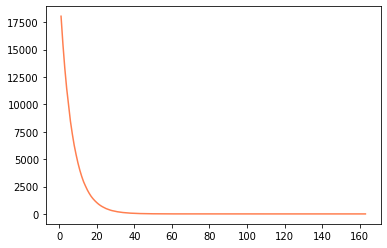

In [113]:
plt.plot(error_dict.keys(),error_dict.values(),color = 'coral')
plt.show()


# Performance Metrics and Computational Analysis
Comparing the performance and computational time of all models implemented.


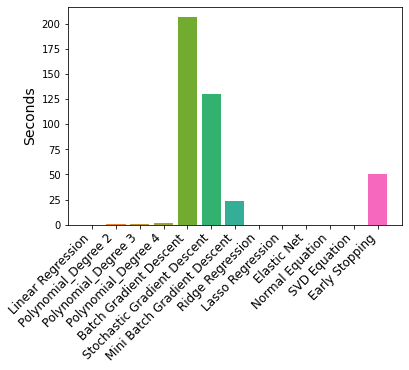

In [107]:
plt.bar(Time_Dictionary.keys(),Time_Dictionary.values(),color = sns.color_palette("husl", 13))
plt.ylabel('Seconds',fontsize=14)
# We Rotate the x-axis labels by 45 degrees to avoid overlapping
plt.xticks(rotation=45,fontsize=12,ha = 'right') # ha helps us to shift the labels to the left a little bit
plt.show()

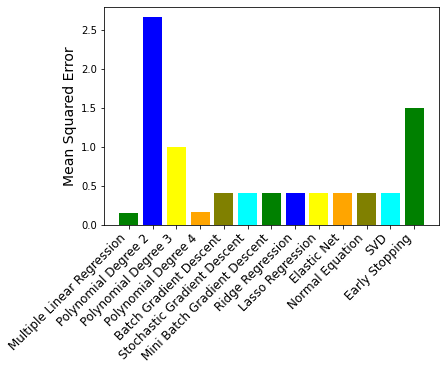

In [108]:
plt.bar(MSE_Dictionary.keys(),MSE_Dictionary.values(),color = ['green','blue','yellow','orange','olive','cyan'])
plt.ylabel('Mean Squared Error',fontsize=14)
# We Rotate the x-axis labels by 45 degrees to avoid overlapping
plt.xticks(rotation=45,fontsize=12,ha = 'right') # ha helps us to shift the labels to the left a little bit
plt.show()

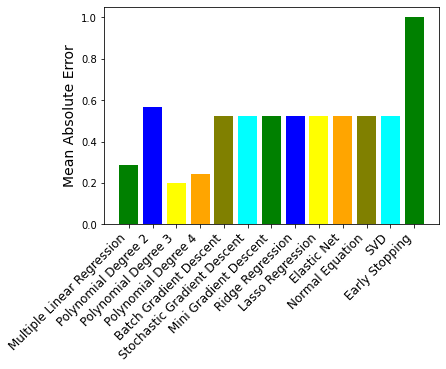

In [109]:
plt.bar(MAE_Dictionary.keys(),MAE_Dictionary.values(),color = ['green','blue','yellow','orange','olive','cyan'])
plt.ylabel('Mean Absolute Error',fontsize=14)
# We Rotate the x-axis labels by 45 degrees to avoid overlapping
plt.xticks(rotation=45,fontsize=12,ha = 'right') # ha helps us to shift the labels to the left a little bit
plt.show()

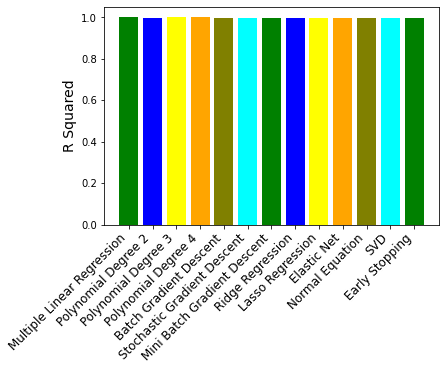

In [110]:
plt.bar(R2_Dictionary.keys(),R2_Dictionary.values(),color = ['green','blue','yellow','orange','olive','cyan'])
plt.ylabel('R Squared',fontsize=14)
# We Rotate the x-axis labels by 45 degrees to avoid overlapping
plt.xticks(rotation=45,fontsize=12,ha = 'right') # ha helps us to shift the labels to the left a little bit
plt.show()


## 10. Conclusion
**Instruction:** Summarize the findings from the analysis, including which models performed best in terms of accuracy and computational efficiency.
